In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from RVISampler import RVISampler
from StochasticProcess import RandomWalk, PyTorchWrap
from prior_distributions import DiscreteUniform

# neural network stuff:
import torch
import torch.nn as nn
from pg_methods.utils.baselines import MovingAverageBaseline
from pg_methods.utils.policies import MultinomialPolicy, RandomPolicy
from pg_methods.utils.networks import MLP_factory

Populating the interactive namespace from numpy and matplotlib


In [2]:
MC_SAMPLES = 2000
POSSIBLE_STEPS = [[-1], [+1]]
STEP_PROBS = np.ones(2)/2
DIMENSIONS = 1
rw = PyTorchWrap(RandomWalk(DIMENSIONS, STEP_PROBS, POSSIBLE_STEPS, n_agents=1, T=100, prior_distribution=DiscreteUniform(DIMENSIONS, -2, 4)))
rw.reset()
print('True Starting Position is:{}'.format(rw.x0))

True Starting Position is:[1]


In [3]:
fn_approximator = MLP_factory(DIMENSIONS+1, hidden_sizes=[32, 32], output_size=2, hidden_non_linearity=nn.ReLU)
policy = MultinomialPolicy(fn_approximator)
policy_optimizer = torch.optim.RMSprop(fn_approximator.parameters(),lr=0.001)

rvi = RVISampler(policy, policy_optimizer, MovingAverageBaseline(0.99))

In [4]:
rvi_results = rvi.solve(rw, MC_SAMPLES, feed_time=True)

/Users/zaf/development/better-sampling/StochasticProcess.py:135: RuntimeWarning: divide by zero encountered in log
  step_log_probs = np.log(self.prior.pdf(self.x_agent))


In [5]:
rvi_results.expectation(True)

0.24230697177020533

In [6]:
rvi_results.variance(True)

0.24148519532440033

In [8]:
len(rvi_results.trajectories())

510

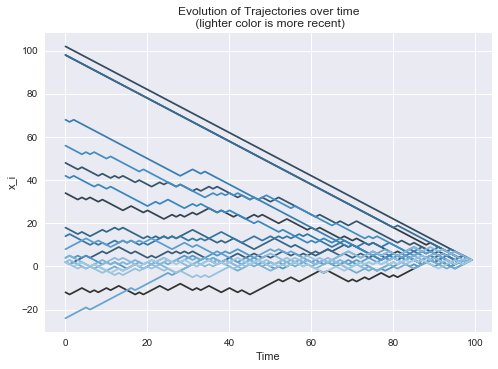

In [16]:
rvi_results.plot_all_trajectory_evolution(step=100)
# rvi_results.plot_mean_all_trajectory()
# rvi_results.plot_mean_trajectory()